In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.preprocessing import LabelEncoder
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from shapely.geometry import Point
from scipy import stats
import scipy
import joblib

In [ ]:
data_train = pd.read_csv('C:\SI22\Width\stream_wdth_all_data_trimmed_v3_train_PUB.csv')

train = data_train.drop(columns=[ 'site_no','Unnamed: 0','COMID','FTYPE','dec_lat_va','dec_long_va','xsec_area_va', 'mean_vel_va',
                                  'Mean_D','SedFluxKgs', 'Avg_K', 'Avg_P', 'Avg_Sin','HUC2','max_vel_va', 'mean_depth_va', 'max_depth_va'])
data_test = pd.read_csv("C:\SI22\Width\stream_wdth_all_data_trimmed_v3_test_PUB.csv")
test = data_test.drop(columns=[ 'site_no','Unnamed: 0','COMID','FTYPE','dec_lat_va','dec_long_va','xsec_area_va', 'mean_vel_va',
                               'Mean_D','SedFluxKgs', 'Avg_K', 'Avg_P', 'Avg_Sin','HUC2','max_vel_va', 'mean_depth_va', 'max_depth_va'])
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [ ]:
train.isnull().sum()

q_va                          0
AI1                           0
MINELEVSMO                    0
percent_sand1km_0_100cm       0
Percent_Clay1km_0_100cm       0
Percent_Silt_1km100cmfinal    0
SLOPE                         0
StreamOrde                    0
D50[mm]                       0
EVI_JAS_2012                  0
TotDASqKM                     0
NLCD_developed_16             0
NLCD_forest_16                0
NLCD_agriculture_16           0
CAT_POPDENS10                 0
ACC_NDAMS2010                 0
stream_wdth_va                0
EVI_JFM_2012                  0
dtype: int64

In [ ]:
train = train[train['q_va'] > 0]
test = test[test['q_va'] > 0]
(test['q_va'] < 0).sum().sum()

0

In [ ]:
X_train = train.drop(columns=['stream_wdth_va'])
X_test = test.drop(columns=['stream_wdth_va'])

y_train = train[["stream_wdth_va"]]
y_test = test[["stream_wdth_va"]]

In [ ]:
column_names = list(X_train.columns.values)

In [ ]:
column_names

['q_va',
 'AI1',
 'MINELEVSMO',
 'percent_sand1km_0_100cm',
 'Percent_Clay1km_0_100cm',
 'Percent_Silt_1km100cmfinal',
 'SLOPE',
 'StreamOrde',
 'D50[mm]',
 'EVI_JAS_2012',
 'TotDASqKM',
 'NLCD_developed_16',
 'NLCD_forest_16',
 'NLCD_agriculture_16',
 'CAT_POPDENS10',
 'ACC_NDAMS2010',
 'EVI_JFM_2012']

In [ ]:
#Gridsearch 
param_grid = {'max_depth': range(5,15,2),
                 'max_features': ['auto'],
                 "min_samples_leaf": range(3,8,1),
                 'min_samples_split': [2, 4, 8, 10],
                 'n_estimators':range(30,100,10)}
forest = RandomForestRegressor( n_jobs=-2, 
                                random_state=42) # 100 decision trees
grid = GridSearchCV(forest, param_grid, cv=4,n_jobs=-2, verbose=True,scoring="neg_root_mean_squared_error")
grid.fit(X_train, y_train)
# select the best hyperparameters
best_params = grid.best_params_

# use the selected hyperparameters to define a random forest estimator
best_forest = RandomForestRegressor (n_estimators=best_params['n_estimators'], n_jobs=-2, 
                                      max_features=best_params['max_features'], 
                                      min_samples_leaf=best_params["min_samples_leaf"],
                                      min_samples_split=best_params['min_samples_split'],
                                      max_depth=best_params['max_depth'], random_state=42)
best_forest.fit(X_train, y_train)
# filename = 'finalized_model_RF_PUB.sav'
# joblib.dump(best_forest, path+filename)
print (grid.best_params_, grid.best_score_)
predict=best_forest.predict(X_test) # make predictions on the test dataset
predict_train=best_forest.predict(X_train) # make predictions on the training dataset


Fitting 4 folds for each of 700 candidates, totalling 2800 fits


C:\Users\zahraghahremani\Miniconda3\envs\SI\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\zahraghahremani\AppData\Local\Temp\ipykernel_15652\2200071229.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_forest.fit(X_train, y_train)


{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40} -284.48488108600964


In [ ]:
print("NSE")
print(sklearn.metrics.r2_score(y_train, predict_train))
print(sklearn.metrics.r2_score(y_test,predict))
print("log-NSE")
print(sklearn.metrics.r2_score(np.log(y_train), np.log(predict_train)))
print(sklearn.metrics.r2_score(np.log(y_test),np.log(predict)))
print("R2")
slope, intercept, r, p, se = scipy.stats.linregress(y_train['stream_wdth_va'],predict_train)
print(r**2)
slope, intercept, r, p, se = scipy.stats.linregress(y_test['stream_wdth_va'],predict)
print(r**2)
print("log-r2")
slope, intercept, r, p, se = scipy.stats.linregress(np.log(y_train['stream_wdth_va']),np.log(predict_train))
print(r**2)
slope, intercept, r, p, se = scipy.stats.linregress(np.log(y_test['stream_wdth_va']),np.log(predict))
print(r**2)
print("mse")
print(sklearn.metrics.mean_squared_error(y_train,predict_train))
print(sklearn.metrics.mean_squared_error(y_test,predict))
print("mae")
print(sklearn.metrics.mean_absolute_error(y_train,predict_train))
print(sklearn.metrics.mean_absolute_error(y_test,predict))
print('pmbe')
MBE_train = ((np.sum(y_train['stream_wdth_va']- predict_train))/len(predict_train))/np.mean(y_train['stream_wdth_va'])*100
MBE = ((np.sum(y_test['stream_wdth_va']- predict))/len(predict))/np.mean(y_test['stream_wdth_va'])*100
print(MBE_train)
print(MBE)

NSE
0.7462928092472603
0.37463529367464543
log-NSE
0.7806020241441964
0.7052566000428029
R2
0.7473553166050262
0.37531745275582956
log-r2
0.7995629839348328
0.727342764149701
mse
43769.1570406478
126563.3828903527
mae
70.2668765796822
98.40577278589735
pmbe
0.012836970291280645
0.9319177695655154


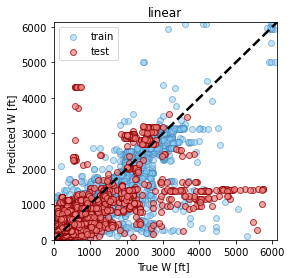

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
lineStart=0
lineEnd=predict_train.max()
plt.scatter(y_train,predict_train,color='lightskyblue',alpha=0.5,edgecolor='steelblue', label = 'train')
plt.scatter(y_test,predict, color="lightcoral",alpha=0.7,edgecolor='darkred', label = 'test')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black',linewidth=2.5) # 45 degree line
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True W [ft] ')
plt.ylabel('Predicted W [ft] ')
plt.legend()
plt.title('linear')
plt.show()

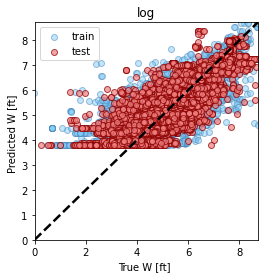

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
lineStart=0
lineEnd=np.log(predict_train.max())
plt.scatter(np.log(y_train),np.log(predict_train),color='lightskyblue',alpha=0.5,edgecolor='steelblue',label = 'train')
plt.scatter(np.log(y_test),np.log(predict), color="lightcoral",alpha=0.7,edgecolor='darkred', label = 'test')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black',linewidth=2.5) # 45 degree line
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True W [ft] ')
plt.ylabel('Predicted W [ft] ')
plt.legend()
plt.title('log')
plt.show()

In [ ]:
import os
import joblib

In [ ]:
joblib.dump(best_forest, "./RFT.joblib")

NameError: name 'best_forest' is not defined

In [ ]:
loaded_rft = joblib.load("C:\\SI22\/RFT.joblib")

In [ ]:
predict_train = loaded_rft.predict(X_train)

In [ ]:
predict = loaded_rft.predict(X_test)

In [ ]:
importances = best_forest.feature_importances_

In [ ]:

indices = np.argsort(importances)[::-1]
print("Feature ranking:")
X_train.columns = ['q_va','AI1','MINELEVSMO','percent_sand1km_0_100cm','Percent_Clay1km_0_100cm','Percent_Silt_1km100cmfinal',
 'SLOPE',
 'StreamOrde',
 'D50[mm]',
 'EVI_JAS_2012',
 'TotDASqKM',
 'NLCD_developed_16',
 'NLCD_forest_16',
 'NLCD_agriculture_16',
 'CAT_POPDENS10',
 'ACC_NDAMS2010',
 'EVI_JFM_2012']
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.768522)
2. feature 16 (0.052245)
3. feature 10 (0.045389)
4. feature 2 (0.022071)
5. feature 1 (0.017202)
6. feature 14 (0.014382)
7. feature 4 (0.013485)
8. feature 8 (0.011023)
9. feature 12 (0.010492)
10. feature 11 (0.009896)
11. feature 15 (0.007351)
12. feature 3 (0.006626)
13. feature 9 (0.005639)
14. feature 7 (0.005555)
15. feature 13 (0.005295)
16. feature 5 (0.003064)
17. feature 6 (0.001764)


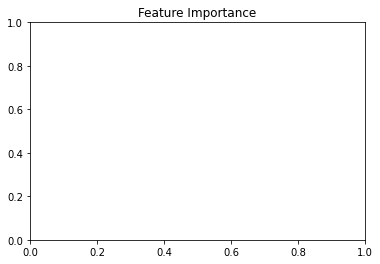

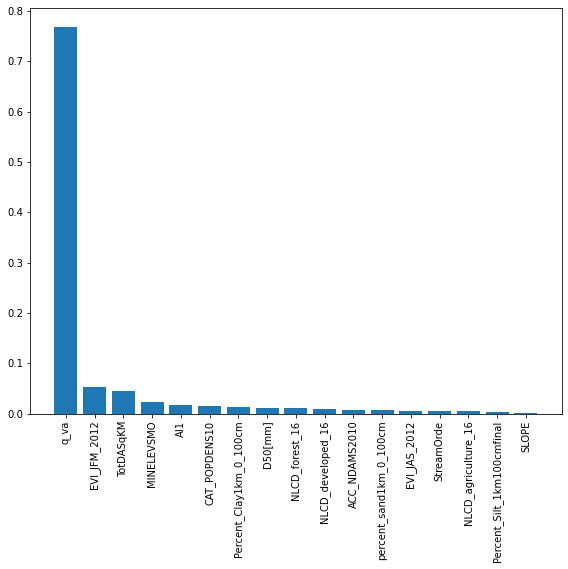

In [ ]:
plt.title('Feature Importance')
plt.figure(figsize=(8,8))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
# plt.show()
